In [13]:
import numpy as np
from numpy import load
import os
from dotenv import load_dotenv

load_dotenv()

True

In [14]:
RAW_MESHES_PATH = os.path.join(os.getenv("DATA_DIR_PATH"), "processed", "pointclouds")

In [15]:
pc = load(os.path.join(RAW_MESHES_PATH, '17803_Ox-eye_daisy_Leucanthemum_vulgare_pollen_grain.npz'))

In [16]:
pc['normals'], pc['points']

(array([[-0.02004889,  0.96669578, -0.25514175],
        [-0.0043882 ,  0.99760713, -0.06899817],
        [ 0.86535892,  0.10371838, -0.4903024 ],
        ...,
        [ 0.86619657, -0.28089867, -0.41327889],
        [-0.47467319, -0.86131637,  0.18116145],
        [-0.50236124,  0.43598308, -0.74669401]], shape=(4000, 3)),
 array([[16.53982948, 43.38622775, 15.4162907 ],
        [28.61487003, 46.74103753, 22.01307071],
        [43.55703722, 42.48830589, 14.81853849],
        ...,
        [45.60506828, 43.7367939 , 17.2696089 ],
        [23.40393869, 24.76807574, 22.57662314],
        [25.85398287, 38.02852625,  5.80723577]], shape=(4000, 3)))

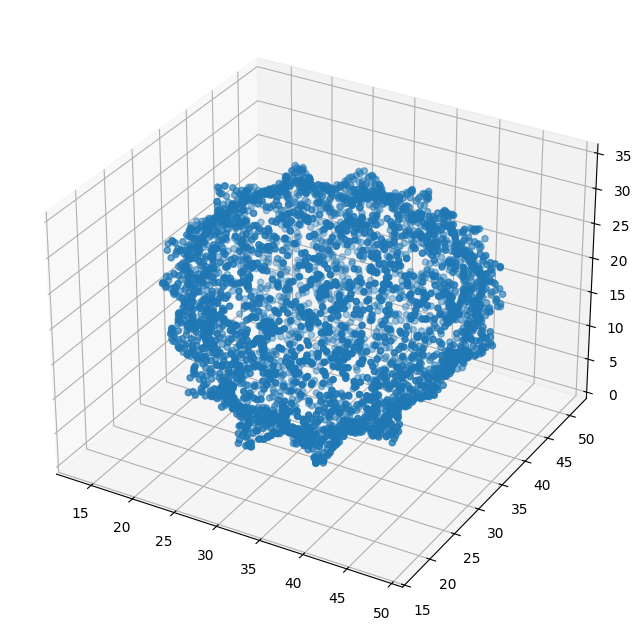

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

points = pc['points']

x, y, z = points[:, 0], points[:, 1], points[:, 2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

plt.show()

In [18]:
os.chdir(os.path.join(os.getcwd(), '..'))

from data import PollenDataset

In [19]:
dataset = PollenDataset()

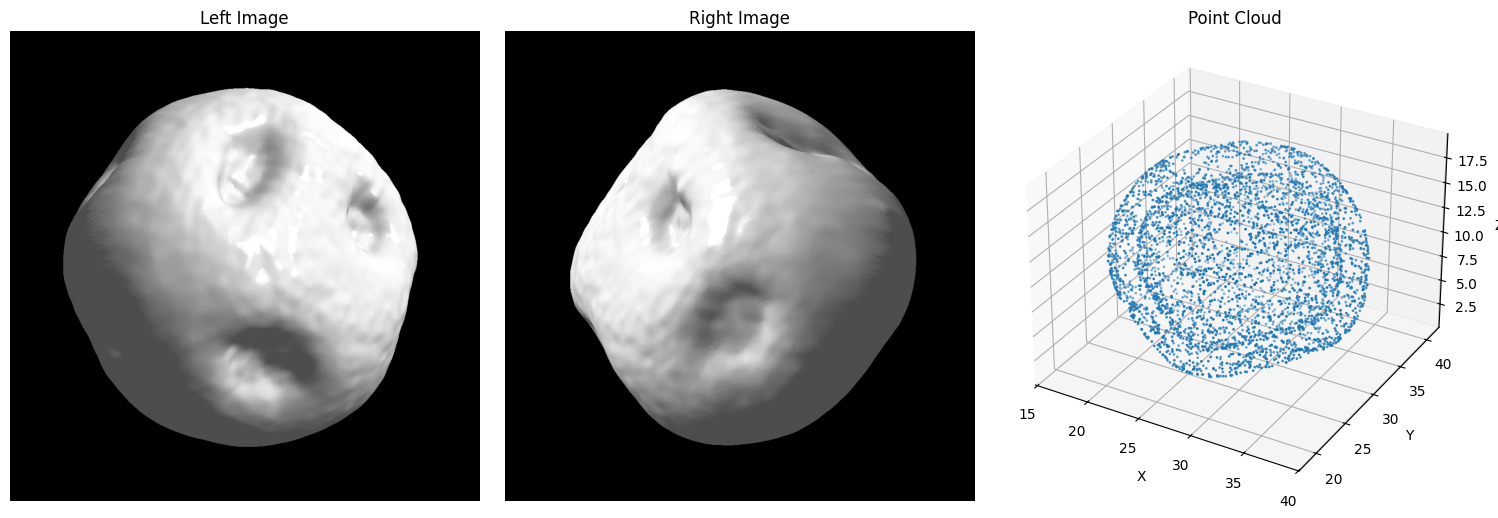

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

(left_image, right_image), points, rotation = dataset[3]

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131)
ax1.imshow(left_image.numpy(), cmap='gray')
ax1.set_title('Left Image')
ax1.axis('off')

ax2 = fig.add_subplot(132)
ax2.imshow(right_image.numpy(), cmap='gray')
ax2.set_title('Right Image')
ax2.axis('off')

ax3 = fig.add_subplot(133, projection='3d')
x, y, z = points[:, 0], points[:, 1], points[:, 2]
ax3.scatter(x, y, z, s=1)
ax3.set_title('Point Cloud')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

plt.tight_layout()
plt.show()